## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [77]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(0)

`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here:

In [78]:
# Read in the data
df = pd.read_csv('ab_data.csv')

# Display the first 5 rows of data
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset.

In [79]:
# Returns the number of rows in the dataset
df.shape[0]

69889

There are 69889 rows in the dataset.

`c)` The proportion of users converted.

In [80]:
# Calculate the proportion of users converted
df.converted.mean() * 100

13.047832992316389

About 13% of users are converted.

`d)` Do any of the rows have missing values?

In [81]:
# Display how many values are missing in each column
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

The dataset has no missing values.

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [82]:
# Display the number of visitors from each country
df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

The company has 48,850 customers in the US, 17,551 users in the UK, and 3,488 users in CA.

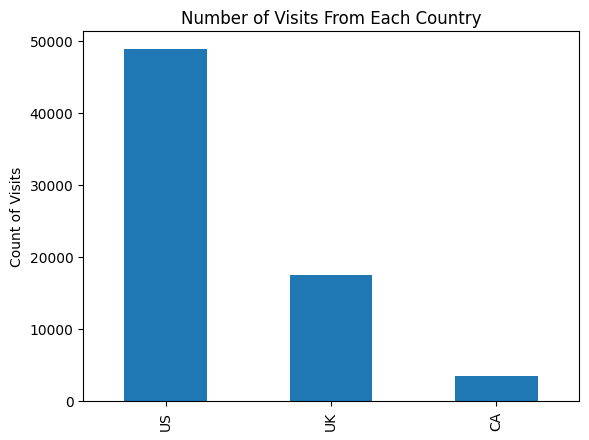

In [83]:
# Plot and display a bar chart
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of our columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**?

In [84]:
# Display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


The converted column is not of a categorical data type.

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not?

In [85]:
# Display the values in the converted column and how many times they appear
df['converted'].value_counts()

0    60770
1     9119
Name: converted, dtype: int64

The possible values of the converted column are 0 or 1. This makes since because the values are essentially representing true or false.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that we have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [86]:
# Calculate the probability of an individual converting
df.converted.mean()

0.13047832992316388

There is about a 13% chance of an individual converting without considering the page they receive or what country they are from.

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [87]:
# Calculate conversion rate for the control group
df.query('group == "control"')['converted'].mean()

0.1052540515600669

The probability of an individual in the control group converting is 10.5%.

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [88]:
# Calculate conversion rate for the treatment group
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

The probability of an individual in the treatment group converting is 15.5%.

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

Yes. This data indicates that the treatment group has a higher conversion rate.

`e)` What is the probability that an individual was in the `treatment` group?

In [89]:
# Calculate the probability that an individual was in the treatment group
df.query('group == "treatment"').shape[0]/df.shape[0]

0.5038131894861853

The probability that an individual was in the treatment group is 50.4%.

`f)` What is the probability that an individual was from Canada `CA`?

In [90]:
# Calculate the probability that an individual was from CA
df.query('country == "CA"').shape[0]/df.shape[0]

0.04990771079855199

The probability that an individual was from CA is about 5%.

`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [91]:
# Calculate probability of an individual in the US converting
df.query('country == "US"')['converted'].mean()

0.13277379733879222

The probability of an individual in the US converting is 13.3%.

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [92]:
# Calculate probability of an individual in the UK converting
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

The probability of an individual in the UK converting is 12.5%.

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

Based on the above calculations, it doesn't appear that there is a large difference in the conversion rate between countries.

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary. Does it appear that there could be an interaction between how country and treatment impact conversion?

In [93]:
# Use group by to calculate and display conversion rates
print(df.query('country == "US"').groupby('group')['converted'].mean())
print(df.query('country == "UK"').groupby('group')['converted'].mean())
print(df.query('country == "CA"').groupby('group')['converted'].mean())

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64
group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64
group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64


##### Solution

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%      |  9.4%       |
| Treatment   | 15.8%       |  14.9%      |  15.4%      |

There does not appear to be an interaction between how country and treatment impact conversion based on the calculated probabilities.

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations you will run for the rest of this section.**

In [94]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

print(p_control_treatment_null)
print(n_treatment)
print(n_control)

0.13047832992316388
35211
34678


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [95]:
# Simulate n_treatment transactions and store in a list
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment)

# Print list
print(treatment_converted)

[1 0 0 ... 0 1 0]


We have successfully simulated n_treatment transactions with a convert rate of p_treatment_null and stored them in the list treatment_converted.

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [96]:
# Simulate n_control transactions and store in a list
control_converted = np.random.binomial(1, p_control_treatment_null, n_control)

# Print list
print(control_converted)

[0 0 0 ... 1 0 0]


We have successfully simulated n_control transactions with a convert rate of p_control_null and stored them in the list control_converted.

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [129]:
print(treatment_converted.mean())
print(control_converted.mean())

print(treatment_converted.mean() - control_converted.mean())

0.1313225980517452
0.12892900397946824
0.002393594072276961


The estimate for 𝑝𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡  - 𝑝𝑐𝑜𝑛𝑡𝑟𝑜𝑙 under the null using the simulated values from part (b) and (c) is 0.0011.

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [105]:
# Create array
p_diffs = []

for _ in range(500):
    # Simulations
    treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment)
    control_converted = np.random.binomial(1, p_control_treatment_null, n_control)
    
    # Calculate the difference between the conversion rates
    p_diff = treatment_converted.mean() - control_converted.mean()

    # Add p_diff to the p_diffs array
    p_diffs.append(p_diff)
    
# Numpy array
p_diffs = np.array(p_diffs)

# Round values for better readability
p_diffs = np.round(p_diffs, 3)

# Verify array has values that are expected
print(p_diffs)

[ 0.001 -0.003  0.003  0.    -0.001  0.001 -0.004  0.005 -0.001 -0.005
  0.003  0.001  0.    -0.001 -0.003 -0.001 -0.    -0.003 -0.002  0.001
  0.001 -0.002  0.002  0.002 -0.002  0.002 -0.003 -0.003 -0.002  0.001
 -0.001  0.002 -0.002  0.006  0.    -0.005 -0.004 -0.001  0.003 -0.001
 -0.    -0.002 -0.002  0.001  0.001  0.001 -0.001 -0.002 -0.     0.002
 -0.004 -0.004  0.     0.001  0.003 -0.001  0.001  0.001 -0.    -0.001
 -0.003 -0.001 -0.    -0.002 -0.004  0.003  0.005 -0.002 -0.004 -0.
  0.005 -0.001  0.002  0.003  0.005 -0.002  0.001  0.    -0.005 -0.002
 -0.006 -0.002 -0.004 -0.006  0.003  0.     0.004  0.001  0.    -0.001
 -0.    -0.001  0.    -0.003 -0.001 -0.002  0.002 -0.    -0.001  0.004
 -0.001  0.002 -0.001  0.002  0.002 -0.     0.001  0.001 -0.003 -0.001
 -0.001  0.002  0.003 -0.     0.001  0.    -0.006  0.005 -0.    -0.005
  0.    -0.002 -0.     0.001 -0.001 -0.004 -0.002 -0.001  0.001 -0.003
  0.     0.003  0.003  0.001 -0.001 -0.001  0.004  0.001 -0.001 -0.001
  0.003 -

We have successfully simulated 500  𝑝𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡  -  𝑝𝑐𝑜𝑛𝑡𝑟𝑜𝑙  values and stored them in a numpy array called p_diffs.

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?

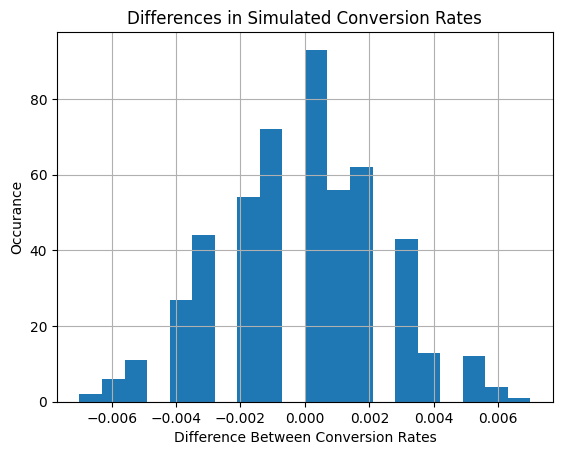

In [107]:
# Convert to Panda Series
p_diffs = pd.Series(p_diffs)

# Plot histogram
plt.xlabel('Difference Between Conversion Rates')
plt.ylabel('Occurance')
plt.title('Differences in Simulated Conversion Rates')
p_diffs.hist(bins=20)

# Display plot
plt.show()

The plot appears to have a normal distribution, with the center being zero. This plot looks as expected for a null hypothesis.

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [111]:
# Calculate proportion of p_diffs greater than difference between treatment and control
p_value = (p_diffs > (df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean())).mean()

# Display result
print(p_value)

0.0


The proportion of the p_diffs that are greater than the difference observed between treatment and control in df is 0.0.

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

In part `g)`, we computed the p-value. The p-value is used to help gauge if there is a significant difference, or if it was random. A p-value of less than 0.05 means that the difference is significant, and most likely not random. 

Our calculated p-value of 0.0  indicates that none of the differences in the simulation were greater than the differences observed. This means that we can reject the null hypothesis and there is more than likely a real difference between the new and old pages. 

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  All the code needed for the modeling and results of the modeling for sections `b) - f)` have been completed for you. 

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Because each row is either a conversion or no conversion, we should use logistic regression. 

The goal is to use **statsmodels** to fit the regression model you specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

It may be helpful to look at the [get_dummies documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to encode the `ab_page` column.

Below you can see an example of the new columns that will need to be added (The order of columns is not important.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [116]:
# Creat the intercept and ab_page columns
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']

# Verify the columns were successfully created
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`.

In [121]:
# Create the X and Y matrix response columns
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`. 

You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [122]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below.

In [123]:
# Display model summary
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                0.007175
Time:                        16:58:13   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

The p-value associated with ab_page is 0.000. This leads us to the same conclusion that was drew in the experiement section, as it still indicates that the difference is significant and not due to random chance.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [124]:
# Create the necessary dummy variables
df['US'] = pd.get_dummies(df['country'])['US']
df['UK'] = pd.get_dummies(df['country'])['UK']

# Verify the columns were successfully created
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


We have successfully created the two new required columns.

`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [125]:
# Create the X and Y matrix response columns
X = df[['intercept', 'ab_page', 'US', 'UK']]
y = df['converted']

We have successfully created the X and Y matrix response columns.

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`. 
You can find the [statsmodels documentation to assist with this exercise here](https://www.statsmodels.org/stable/discretemod.html).

In [127]:
# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


We have successfully fit the regression model on the `X` and `y` from part `b)`.

`d)` Provide the summary of your model below.

In [128]:
# Display model summary
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                0.007312
Time:                        17:01:18   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US             0.0727      0.053      1.372      0.1

We are now able to review the model summary.

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

The p-values associated with the US and UK are 0.17 and 0.905, respectfully. This indicates that the customer's location does not impact the conversion rate.